# PREDICTION OF PRICE RANGE

In [801]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox

In [926]:
import pandas as pd
df1 = pd.read_csv('zomato1.csv', error_bad_lines=False)
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [927]:
df2 = pd.read_excel('Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [928]:
df=pd.merge (df1,df2)

In [929]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [930]:
df.shape

(9551, 22)

In [931]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [932]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [933]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Checking for null values in dataset. There are only 9 null values in the cuisines dataset

<Axes: >

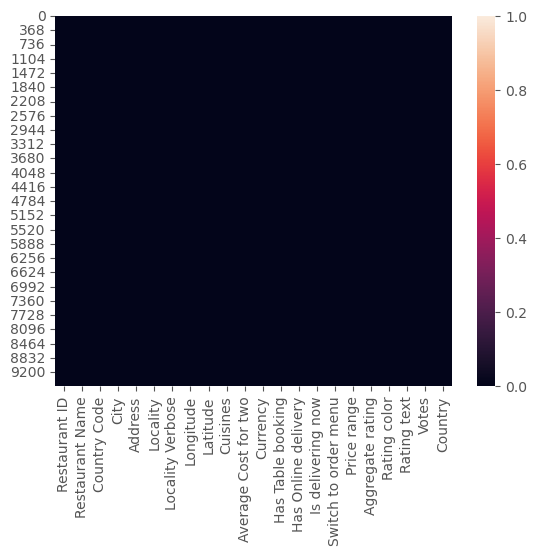

In [934]:
sns.heatmap(df.isnull())

In [935]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [936]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [937]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1

We can drop columns- Restaurant ID, country Code, Address as these values does not affect the price range. we can drop column Switch to order menu as it contains only one value throghout the entire column. We can drop Locality Verbose, Longitude and latitude also as this also doesn't affect the price range. 

In [938]:
df.drop(["Restaurant ID", "Longitude","Latitude"], axis=1, inplace=True)
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul","World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul","Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [939]:
df.drop(["Switch to order menu"], axis=1, inplace=True)
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul","World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul","Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [940]:
df.drop(["Address"], axis=1, inplace=True)
df

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,Karak�_y,"Karak�_y, ��stanbul",Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,208,��stanbul,Ko��uyolu,"Ko��uyolu, ��stanbul","World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,��stanbul,Kuru�_e��me,"Kuru�_e��me, ��stanbul","Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,208,��stanbul,Kuru�_e��me,"Kuru�_e��me, ��stanbul",Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [941]:
df.drop(["Locality Verbose"], axis=1, inplace=True)
df

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,Karak�_y,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,208,��stanbul,Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,��stanbul,Kuru�_e��me,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,208,��stanbul,Kuru�_e��me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [942]:
df.head(60)

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,Din Tai Fung,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Chinese,1000,Botswana Pula(P),No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,Buffet 101,162,Pasay City,"SM by the Bay, Mall of Asia Complex, Pasay City","Asian, European",2000,Botswana Pula(P),Yes,No,No,4,4.0,Green,Very Good,520,Phillipines
7,Vikings,162,Pasay City,"SM by the Bay, Mall of Asia Complex, Pasay City","Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,4,4.2,Green,Very Good,677,Phillipines
8,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Sofitel Philippine Plaza Manila, Pasay City","European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,Locavore,162,Pasig City,Kapitolyo,Filipino,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [943]:
df.drop(["Country Code"], axis=1, inplace=True)
df

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,��stanbul,Karak�_y,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,��stanbul,Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,��stanbul,Kuru�_e��me,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,��stanbul,Kuru�_e��me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


We can fill Categorical column: cuisines with the mode value of that column

In [944]:
df["Cuisines"]=df["Cuisines"].fillna(df['Cuisines'].mode()[0])

In [945]:
df.isnull().sum()

Restaurant Name         0
City                    0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Now there are no null values

In [946]:
df.head(60)

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,Din Tai Fung,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Chinese,1000,Botswana Pula(P),No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,Buffet 101,Pasay City,"SM by the Bay, Mall of Asia Complex, Pasay City","Asian, European",2000,Botswana Pula(P),Yes,No,No,4,4.0,Green,Very Good,520,Phillipines
7,Vikings,Pasay City,"SM by the Bay, Mall of Asia Complex, Pasay City","Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,4,4.2,Green,Very Good,677,Phillipines
8,Spiral - Sofitel Philippine Plaza Manila,Pasay City,"Sofitel Philippine Plaza Manila, Pasay City","European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,Locavore,Pasig City,Kapitolyo,Filipino,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [947]:
df.tail(50)

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9501,The Commons,Colombo,"Cinnamon Gardens, Colombo 07","Cafe, Sri Lankan, Continental, American",2500,Sri Lankan Rupee(LKR),No,No,No,3,4.0,Green,Very Good,209,Sri Lanka
9502,Upali's,Colombo,"Cinnamon Gardens, Colombo 07",Sri Lankan,2500,Sri Lankan Rupee(LKR),No,No,No,3,4.0,Green,Very Good,114,Sri Lanka
9503,Malay Restaurant,Colombo,"Dehiwala, Colombo","Malaysian, North Indian, Sri Lankan",1500,Sri Lankan Rupee(LKR),No,No,No,2,3.5,Yellow,Good,80,Sri Lanka
9504,T.G.I. Friday's,Colombo,"Fort, Colombo 01","American, Steak",4000,Sri Lankan Rupee(LKR),No,No,No,4,4.0,Green,Very Good,166,Sri Lanka
9505,Simply Strawberries By Jagro,Colombo,"Havelock Town, Colombo 05","Juices, Desserts",1300,Sri Lankan Rupee(LKR),No,No,No,2,4.5,Dark Green,Excellent,146,Sri Lanka
9506,Cafe Shaze,Colombo,"Havelock Town, Colombo 05","Cafe, Fast Food, Beverages",3500,Sri Lankan Rupee(LKR),No,No,No,3,3.8,Yellow,Good,81,Sri Lanka
9507,Queen's Cafe,Colombo,"Kollupitiya, Colombo 03","American, Chinese, North Indian",2000,Sri Lankan Rupee(LKR),No,No,No,3,2.5,Orange,Average,93,Sri Lanka
9508,Arabian Knights,Colombo,"Kollupitiya, Colombo 03","Middle Eastern, Arabian",2400,Sri Lankan Rupee(LKR),No,No,No,3,4.2,Green,Very Good,158,Sri Lanka
9509,Butter Boutique,Colombo,"Kollupitiya, Colombo 03","Desserts, Bakery",1000,Sri Lankan Rupee(LKR),No,No,No,2,4.2,Green,Very Good,49,Sri Lanka
9510,Carnival Ice Cream,Colombo,"Kollupitiya, Colombo 03","Desserts, Ice Cream",1000,Sri Lankan Rupee(LKR),No,No,No,2,4.1,Green,Very Good,122,Sri Lanka


In [948]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Restaurant Name,7446
City,141
Locality,1208
Cuisines,1825
Average Cost for two,140
Currency,12
Has Table booking,2
Has Online delivery,2
Is delivering now,2
Price range,4


In [949]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
    print("Categorical Columns:",categorical_col)
    print("\n")
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
    print("Numerical Columns:",numerical_col)
    print("\n")

Categorical Columns: ['Restaurant Name']


Categorical Columns: ['Restaurant Name', 'City']


Categorical Columns: ['Restaurant Name', 'City', 'Locality']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Currency']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'C

Columns have now been separated into two types: categorical column and numerical column

In [950]:
df["Average Cost for two"].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

In [951]:
df["Price range"].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [952]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


UNIVARIATE ANALYSIS will provide the overall view of the dataset

<Axes: xlabel='Price range', ylabel='count'>

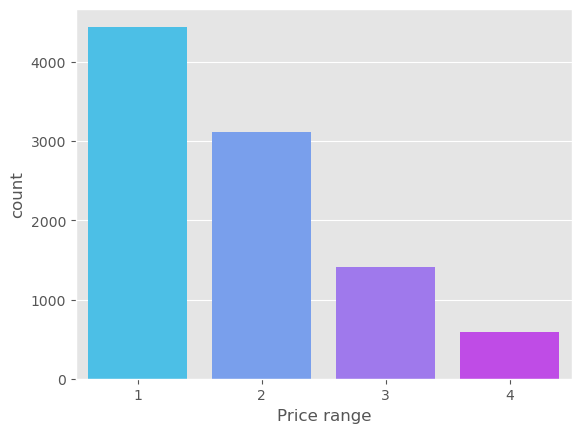

In [953]:
sns.countplot(x=df["Price range"], palette="cool")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Botswana Pula(P)'),
  Text(1, 0, 'Brazilian Real(R$)'),
  Text(2, 0, 'Dollar($)'),
  Text(3, 0, 'Emirati Diram(AED)'),
  Text(4, 0, 'Indian Rupees(Rs.)'),
  Text(5, 0, 'Indonesian Rupiah(IDR)'),
  Text(6, 0, 'NewZealand($)'),
  Text(7, 0, 'Pounds(��)'),
  Text(8, 0, 'Qatari Rial(QR)'),
  Text(9, 0, 'Rand(R)'),
  Text(10, 0, 'Sri Lankan Rupee(LKR)'),
  Text(11, 0, 'Turkish Lira(TL)')])

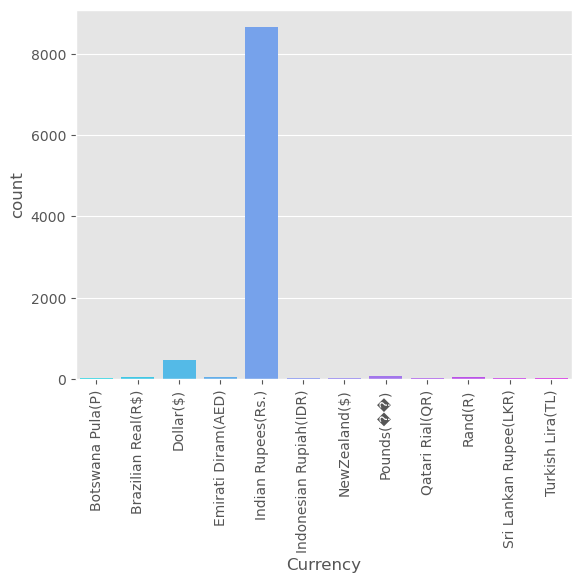

In [954]:
sns.countplot(x=df["Currency"], palette="cool")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Dark Green'),
  Text(1, 0, 'Green'),
  Text(2, 0, 'Yellow'),
  Text(3, 0, 'Orange'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Red')])

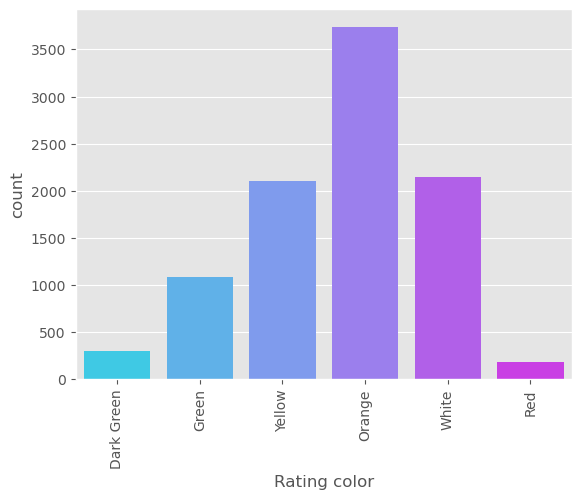

In [955]:
sns.countplot(x=df["Rating color"], palette="cool")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Very Good'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Average'),
  Text(4, 0, 'Not rated'),
  Text(5, 0, 'Poor')])

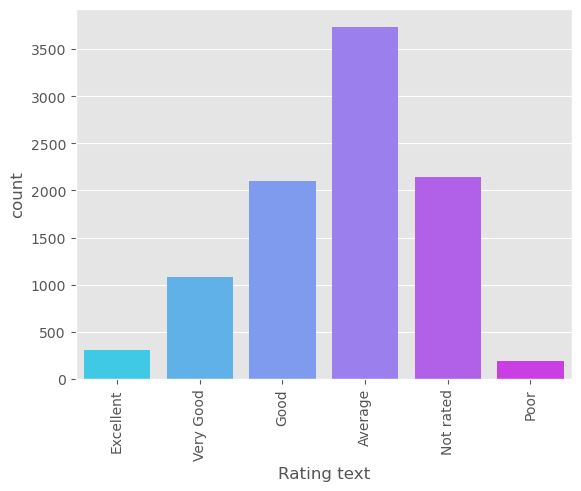

In [956]:
sns.countplot(x=df["Rating text"], palette="cool")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Phillipines'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'UAE'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'New Zealand'),
  Text(10, 0, 'United Kingdom'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'South Africa'),
  Text(13, 0, 'Sri Lanka'),
  Text(14, 0, 'Turkey')])

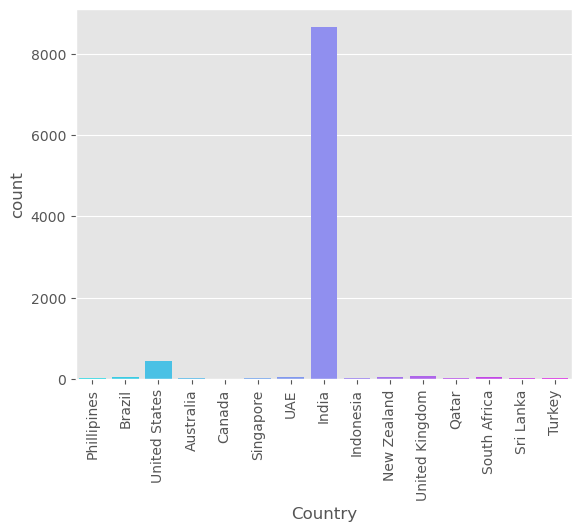

In [957]:
sns.countplot(x=df["Country"], palette="cool")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.8'),
  Text(2, 0, '1.9'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.1'),
  Text(5, 0, '2.2'),
  Text(6, 0, '2.3'),
  Text(7, 0, '2.4'),
  Text(8, 0, '2.5'),
  Text(9, 0, '2.6'),
  Text(10, 0, '2.7'),
  Text(11, 0, '2.8'),
  Text(12, 0, '2.9'),
  Text(13, 0, '3.0'),
  Text(14, 0, '3.1'),
  Text(15, 0, '3.2'),
  Text(16, 0, '3.3'),
  Text(17, 0, '3.4'),
  Text(18, 0, '3.5'),
  Text(19, 0, '3.6'),
  Text(20, 0, '3.7'),
  Text(21, 0, '3.8'),
  Text(22, 0, '3.9'),
  Text(23, 0, '4.0'),
  Text(24, 0, '4.1'),
  Text(25, 0, '4.2'),
  Text(26, 0, '4.3'),
  Text(27, 0, '4.4'),
  Text(28, 0, '4.5'),
  Text(29, 0, '4.6'),
  Text(30, 0, '4.7'),
  Text(31, 0, '4.8'),
  Text(32, 0, '4.9')])

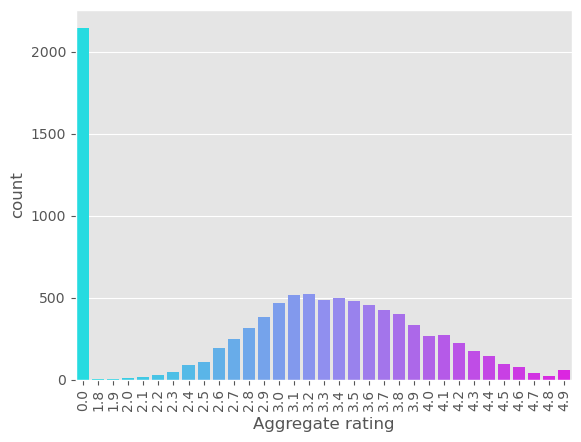

In [958]:
sns.countplot(x=df["Aggregate rating"], palette="cool")
plt.xticks(rotation=90)

Distribution plot will tell about the skewness in the data. whether data is normally distributed or not

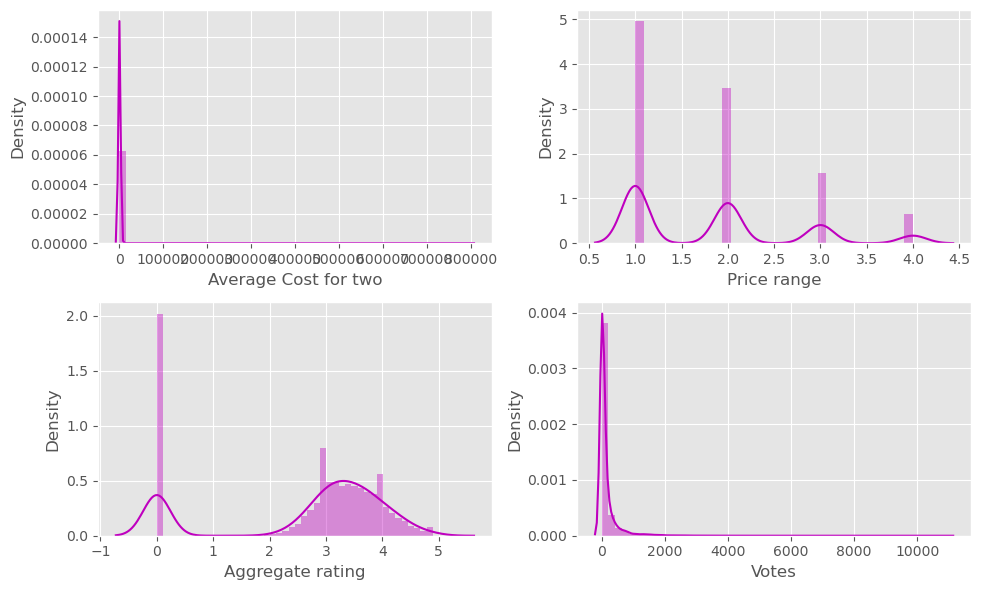

In [959]:
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

BIOVARIATE ANALYSIS

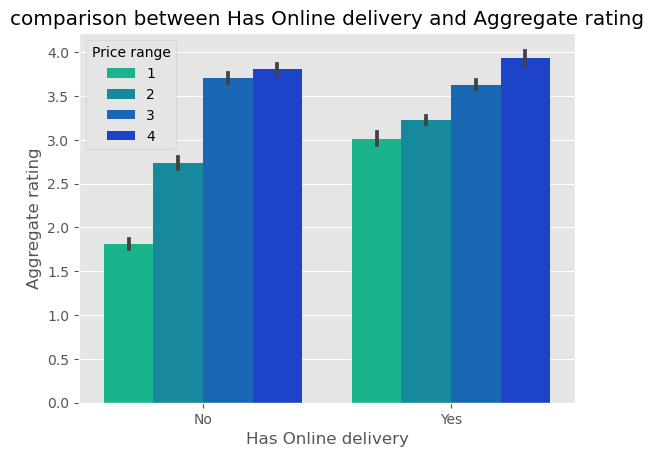

In [960]:
plt.title("comparison between Has Online delivery and Aggregate rating")
sns.barplot(x="Has Online delivery", y="Aggregate rating", data=df, hue="Price range", palette="winter_r")
plt.show()

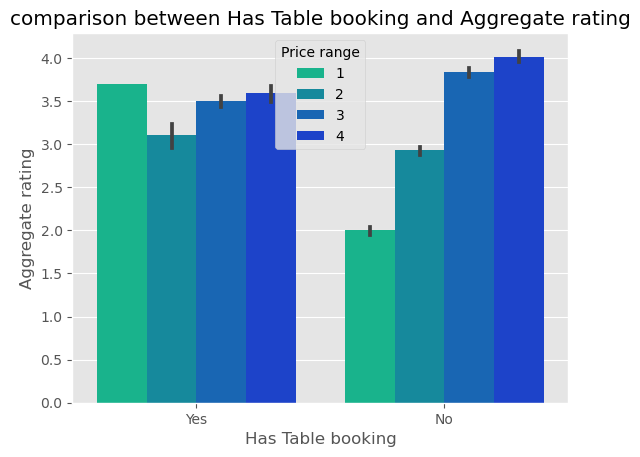

In [961]:
plt.title("comparison between Has Table booking and Aggregate rating")
sns.barplot(x="Has Table booking", y="Aggregate rating", data=df, hue="Price range", palette="winter_r")
plt.show()

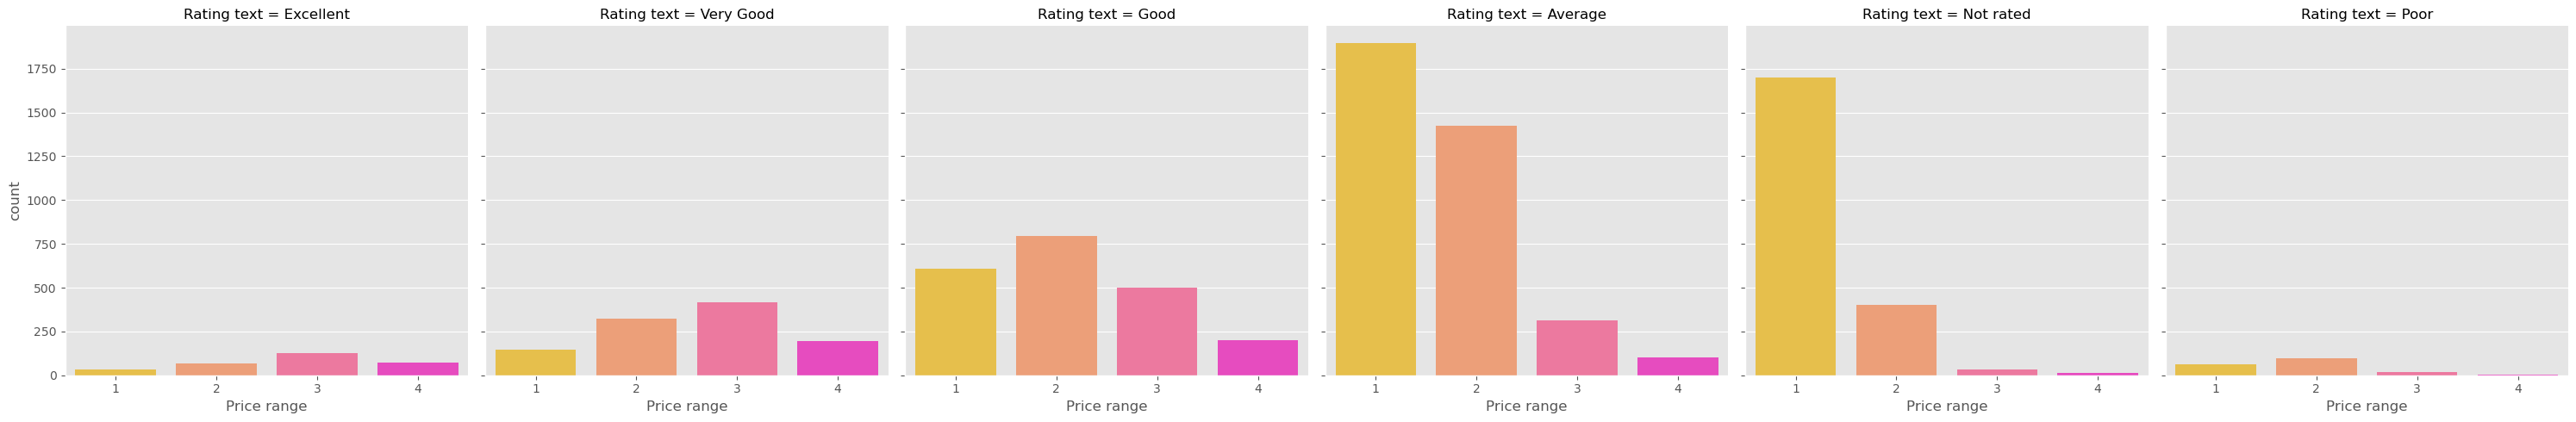

In [962]:
sns.catplot(x="Price range", col="Rating text", data=df, kind="count", palette="spring_r")

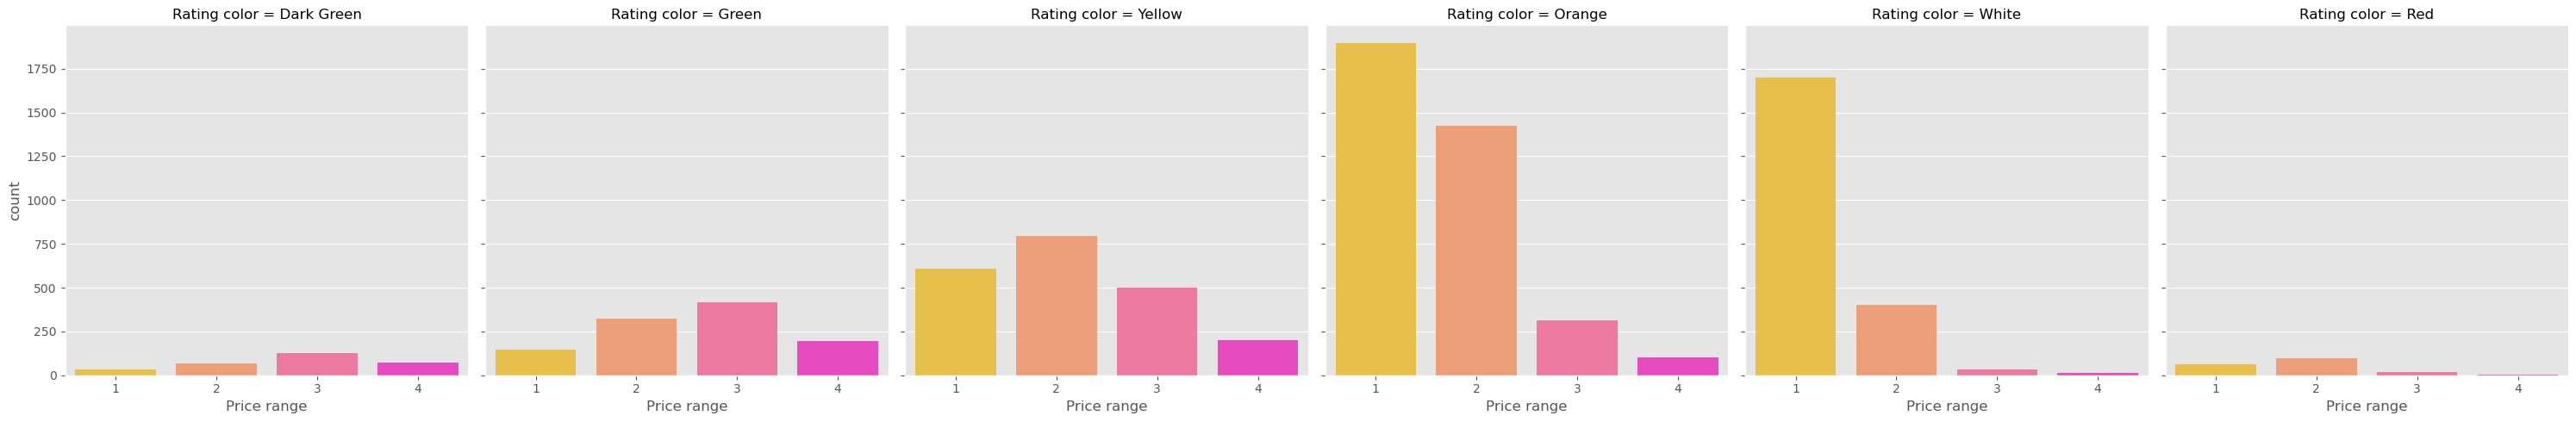

In [963]:
sns.catplot(x="Price range", col="Rating color", data=df, kind="count", palette="spring_r")

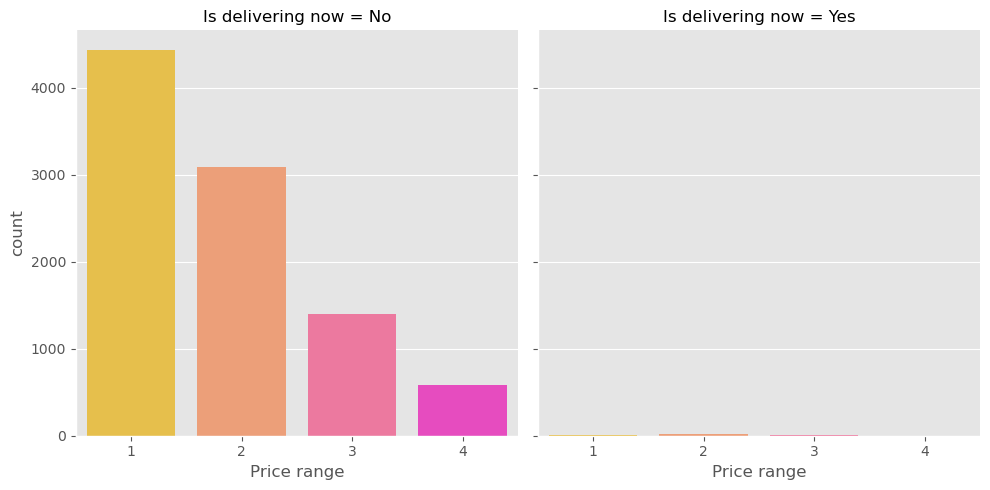

In [964]:
sns.catplot(x="Price range", col="Is delivering now", data=df, kind="count", palette="spring_r")

MULTIVARIATE ANALYSIS

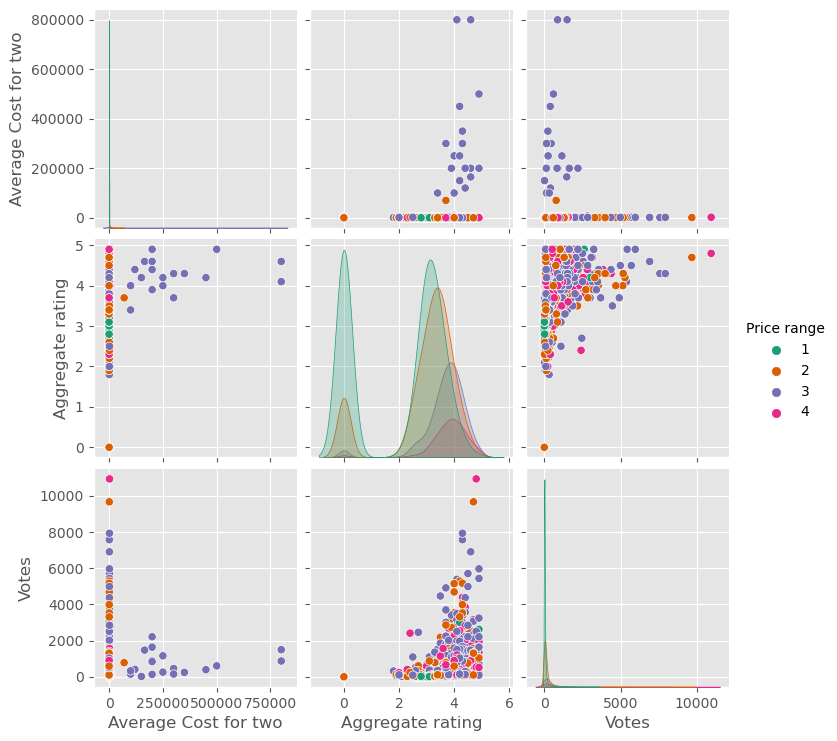

In [841]:
sns.pairplot(df, hue="Price range",  palette="Dark2")
plt.show()

PREDICTION OF PRICE RANGE

BOXPLOT Will tell about the outliers 

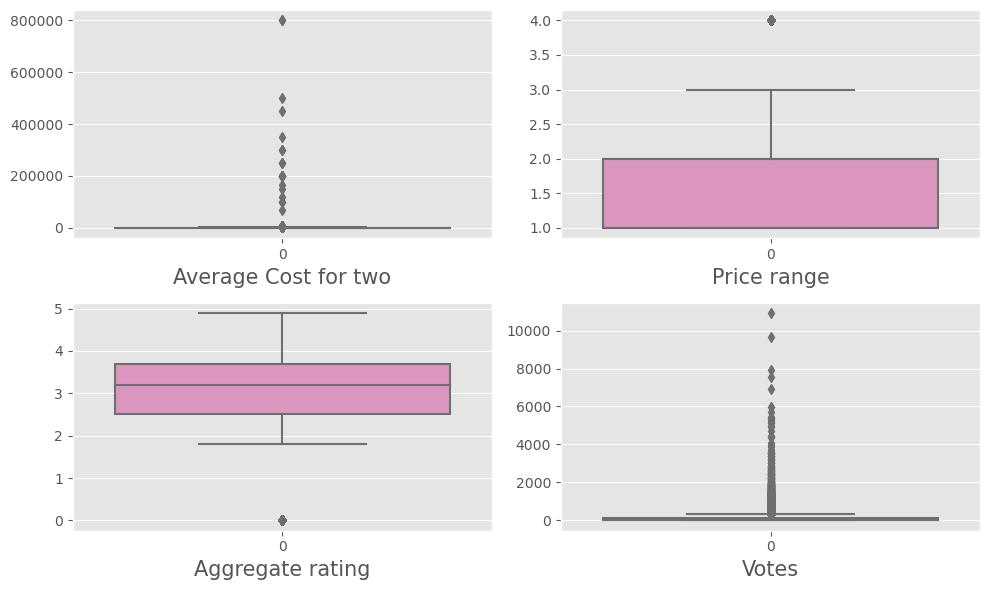

In [965]:
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

Z-score method can be used to remove the outliers. But we can not remove outliers from Target variables i.e. Price range. Aggregate rating has negligible outliers. So we can remove outliers from Votes and average cost for two. 

In [966]:
from scipy.stats import zscore
out_features=df[['Votes','Average Cost for two']]
z=np.abs(zscore(out_features))
z 

,Votes,Average Cost for two
0,0.365202,0.006154
1,1.009168,0.000049
2,0.262911,0.173743
3,0.483766,0.018659
4,0.167595,0.018659
...,...,...
9546,1.467151,0.069428
9547,2.039049,0.067878
9548,1.171903,0.063845
9549,1.729853,0.066947


In [967]:
np.where(z>3)

(array([ 102,  336,  341,  342,  343,  350,  352,  409,  429,  454,  458,
         468,  469,  470,  472,  585,  591,  600,  644,  726,  727,  728,
         731,  735,  736,  739,  743,  793,  805,  807,  811,  813,  814,
         815,  817,  821,  824, 1144, 1147, 1163, 1235, 1247, 1248, 1251,
        1252, 1253, 1255, 1256, 1258, 1464, 1554, 1555, 1839, 1861, 1866,
        2300, 2302, 2304, 2307, 2311, 2314, 2338, 2344, 2402, 2404, 2406,
        2409, 2410, 2411, 2412, 2413, 2414, 2416, 2480, 2483, 2484, 2485,
        2488, 2490, 2492, 2495, 2499, 2635, 2880, 3005, 3008, 3013, 3016,
        3018, 3025, 3026, 3028, 3033, 3041, 3049, 3055, 3056, 3057, 3060,
        3068, 3075, 3080, 3083, 3085, 3093, 3094, 3095, 3101, 3107, 3110,
        3112, 3115, 3116, 3117, 3118, 3119, 3316, 3319, 3336, 3337, 3338,
        3438, 3588, 3589, 3599, 3601, 3605, 3976, 3983, 3984, 3986, 3992,
        3993, 3994, 3998, 4087, 4162, 4178, 4320, 4386, 4638, 4639, 4649,
        4673, 5007, 5026, 6144, 6317, 

In [968]:
df1=df[(z<3).all(axis=1)]
df1.shape

(9362, 15)

In [969]:
print("Old Data Frame", df.shape[0])
print("New Data Frame", df1.shape[0])

Old Data Frame 9551
New Data Frame 9362


In [970]:
print("Data Loss Percentage", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage 1.978850382158936


In [971]:
df=df1

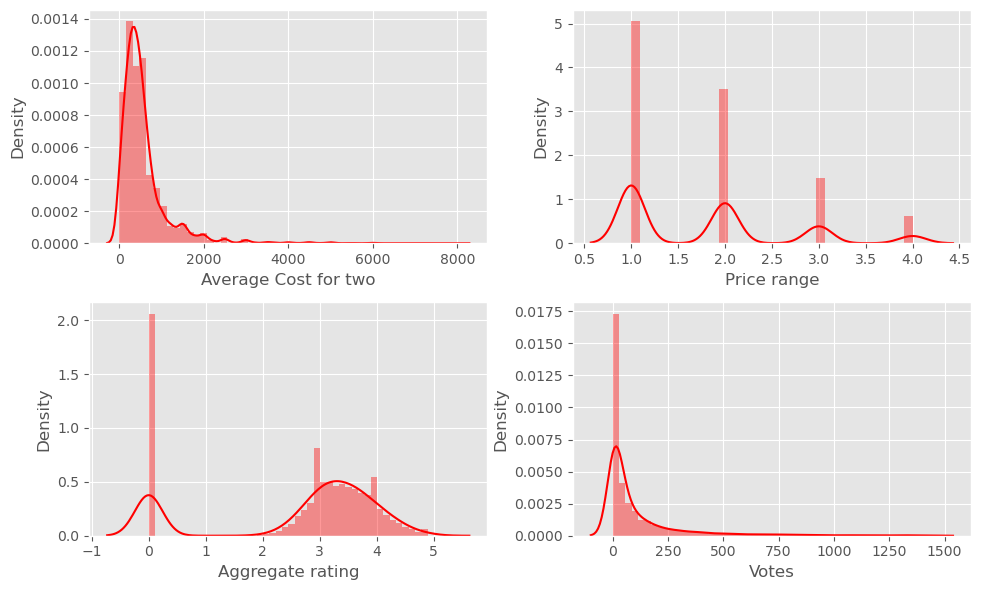

In [972]:
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color="r")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

We can not remove skewness from Price range as this is our target variable

In [973]:
df.skew()

Average Cost for two    3.619524
Price range             0.933571
Aggregate rating       -0.940907
Votes                   3.216882
dtype: float64

In [974]:
df["Votes"]=np.cbrt(df["Votes"])

In [975]:
df["Average Cost for two"]=np.cbrt(df["Average Cost for two"])

In [976]:
df.skew()

Average Cost for two    0.464188
Price range             0.933571
Aggregate rating       -0.940907
Votes                   0.690515
dtype: float64

In [977]:
df["Votes"]=boxcox(df["Votes"],0.5)

In [978]:
df.skew()

Average Cost for two    0.464188
Price range             0.933571
Aggregate rating       -0.940907
Votes                  -0.601934
dtype: float64

skewness of votes and average cost for two column was removed by cbrt and boxcox transformation method

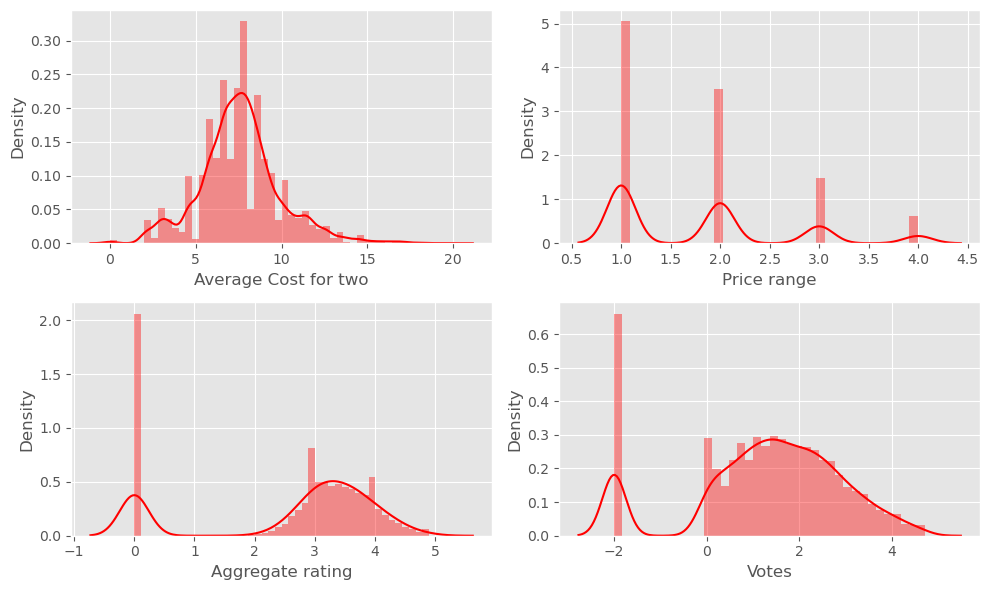

In [979]:
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color="r")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

Now ordinal encoder will be used for coding of categorical data

In [980]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [981]:
df

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3699.0,70.0,160.0,881.0,10.322801,0.0,1.0,0.0,0.0,3,4.8,0.0,1.0,3.214167,5.0
1,3127.0,70.0,565.0,1063.0,10.626586,0.0,1.0,0.0,0.0,3,4.5,0.0,1.0,3.793770,5.0
2,2853.0,72.0,293.0,1611.0,15.874011,0.0,1.0,0.0,0.0,4,4.4,1.0,5.0,3.084606,5.0
3,4634.0,72.0,823.0,1078.0,11.447142,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,3.346614,5.0
4,5439.0,72.0,823.0,1074.0,11.447142,0.0,1.0,0.0,0.0,4,4.8,0.0,1.0,2.946932,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4376.0,136.0,494.0,1748.0,4.308869,10.0,0.0,0.0,0.0,3,4.1,1.0,5.0,4.078331,10.0
9547,1292.0,136.0,525.0,1758.0,4.717694,10.0,0.0,0.0,0.0,3,4.2,1.0,5.0,4.359897,10.0
9548,3024.0,136.0,527.0,1062.0,5.539658,10.0,0.0,0.0,0.0,4,3.7,5.0,2.0,3.902875,10.0
9549,501.0,136.0,527.0,1597.0,4.932424,10.0,0.0,0.0,0.0,4,4.0,1.0,5.0,4.215615,10.0


In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9362 non-null   float64
 1   City                  9362 non-null   float64
 2   Locality              9362 non-null   float64
 3   Cuisines              9362 non-null   float64
 4   Average Cost for two  9362 non-null   float64
 5   Currency              9362 non-null   float64
 6   Has Table booking     9362 non-null   float64
 7   Has Online delivery   9362 non-null   float64
 8   Is delivering now     9362 non-null   float64
 9   Price range           9362 non-null   int64  
 10  Aggregate rating      9362 non-null   float64
 11  Rating color          9362 non-null   float64
 12  Rating text           9362 non-null   float64
 13  Votes                 9362 non-null   float64
 14  Country               9362 non-null   float64
dtypes: float64(14), int64

In [983]:
df.describe()

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000
mean,3594.913587,75.689276,632.035249,950.745247,7.592141,3.951399,0.117069,0.255715,0.003632,1.782739,2.635089,2.980132,1.758171,1.348647,3.646443
std,2107.036588,22.514122,302.533073,495.765508,2.356731,0.801857,0.321520,0.436285,0.060157,0.895340,1.514346,1.473633,1.677773,1.601619,2.381465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,1752.250000,82.000000,365.000000,476.000000,6.299605,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,0.519842,3.000000
50%,3536.500000,85.000000,668.500000,1084.500000,7.368063,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,1.505605,3.000000
75%,5394.000000,85.000000,881.000000,1296.000000,8.662391,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,2.429387,3.000000
max,7322.000000,136.000000,1157.000000,1758.000000,20.000000,10.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,4.720065,13.000000


In [984]:
cor=df.corr()
cor

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,-0.001036,0.007366,0.055027,0.042187,0.007634,0.037859,0.028079,0.012186,0.063456,0.029065,-0.007512,0.011005,0.035941,0.016364
City,-0.001036,1.000000,0.093549,0.027373,0.029378,-0.049116,0.004834,0.015029,-0.014626,-0.100563,-0.128932,0.104108,-0.095570,-0.114308,-0.190224
Locality,0.007366,0.093549,1.000000,0.007156,0.002613,0.037704,-0.056629,-0.027486,-0.007978,-0.106548,-0.169679,0.034725,-0.028318,-0.181752,-0.126531
Cuisines,0.055027,0.027373,0.007156,1.000000,0.076822,0.082431,0.052830,-0.015529,0.007825,-0.006199,-0.081391,-0.015929,-0.084031,-0.061329,-0.124799
Average Cost for two,0.042187,0.029378,0.002613,0.076822,1.000000,0.199937,0.549904,0.212014,0.029270,0.601337,0.186787,0.021390,-0.055157,0.242747,-0.456875
Currency,0.007634,-0.049116,0.037704,0.082431,0.199937,1.000000,0.006740,0.027284,0.003659,0.040494,-0.039970,-0.019621,-0.013184,-0.042880,-0.194558
Has Table booking,0.037859,0.004834,-0.056629,0.052830,0.549904,0.006740,1.000000,0.091947,-0.016461,0.503988,0.184989,-0.014030,0.028723,0.250568,-0.060202
Has Online delivery,0.028079,0.015029,-0.027486,-0.015529,0.212014,0.027284,0.091947,1.000000,0.103000,0.079068,0.229227,0.010395,-0.085968,0.283378,-0.136909
Is delivering now,0.012186,-0.014626,-0.007978,0.007825,0.029270,0.003659,-0.016461,0.103000,1.000000,0.012667,0.020647,0.000814,-0.031517,0.027238,-0.016389
Price range,0.063456,-0.100563,-0.106548,-0.006199,0.601337,0.040494,0.503988,0.079068,0.012667,1.000000,0.426773,-0.122696,0.147713,0.480637,0.170036


In [985]:
cor["Price range"].sort_values(ascending=False)

Price range             1.000000
Average Cost for two    0.601337
Has Table booking       0.503988
Votes                   0.480637
Aggregate rating        0.426773
Country                 0.170036
Rating text             0.147713
Has Online delivery     0.079068
Restaurant Name         0.063456
Currency                0.040494
Is delivering now       0.012667
Cuisines               -0.006199
City                   -0.100563
Locality               -0.106548
Rating color           -0.122696
Name: Price range, dtype: float64

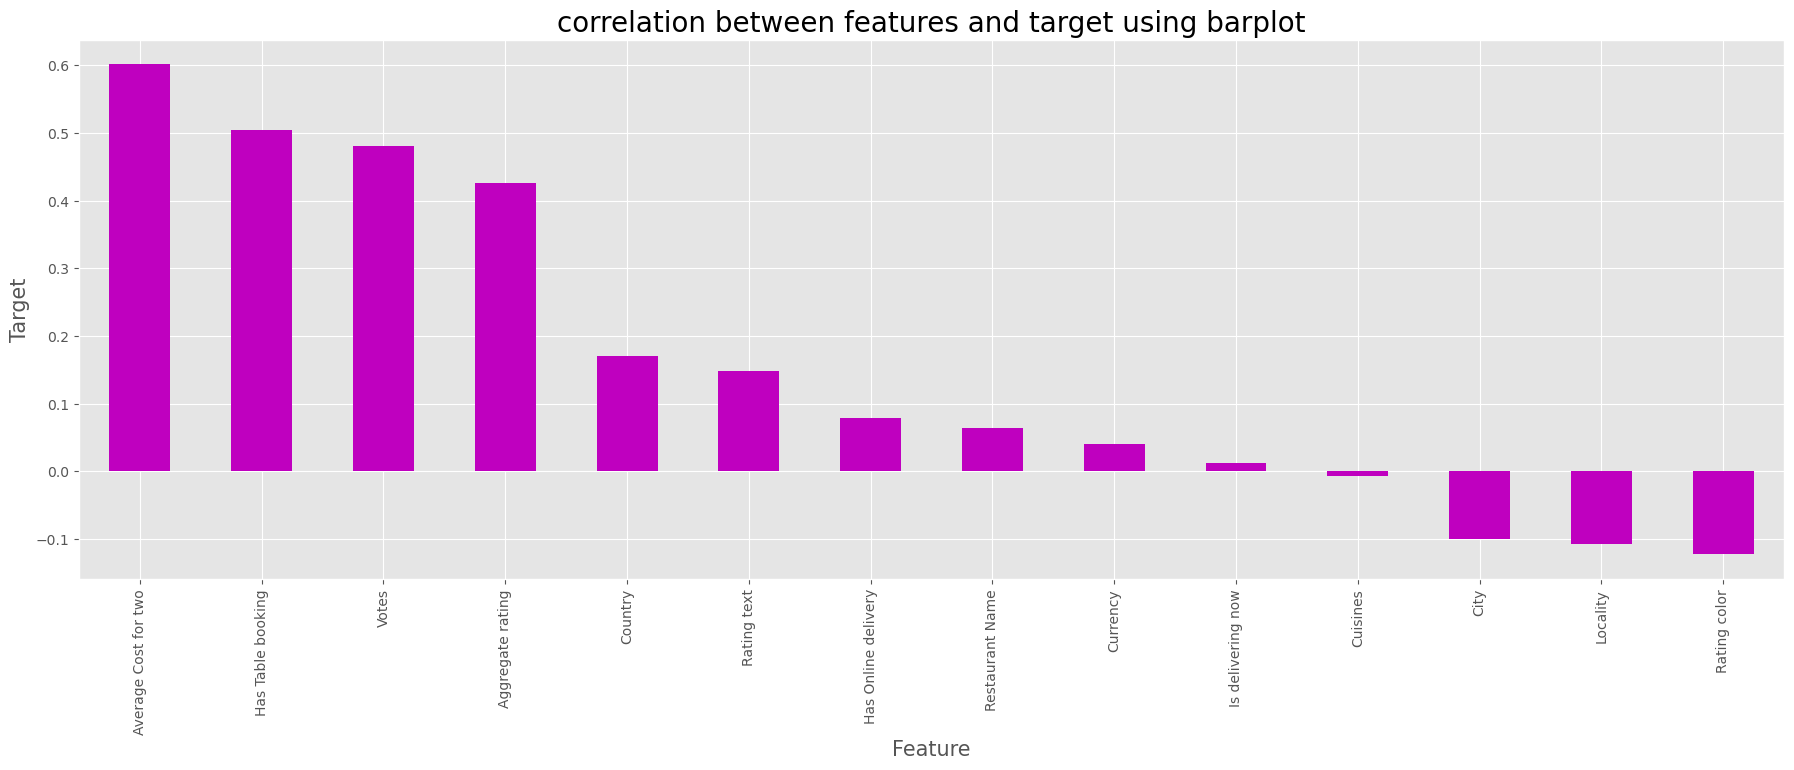

In [986]:
plt.figure(figsize=(22,7))
df.corr()["Price range"].sort_values(ascending=False).drop(["Price range"]).plot(kind="bar", color="m")
plt.xlabel("Feature", fontsize=15);
plt.ylabel("Target", fontsize=15);
plt.title("correlation between features and target using barplot", fontsize=20)
plt.show()

In [987]:
x=df.drop("Price range", axis=1)
y=df["Price range"]

Scaling of data for model development

In [988]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.049402,-0.252712,-1.560360,-0.140689,1.158726,-4.928073,2.746265,-0.586149,-0.060373,1.429678,-2.022410,-0.451916,1.164834,0.568402
1,-0.222084,-0.252712,-0.221592,0.226439,1.287634,-4.928073,2.746265,-0.586149,-0.060373,1.231562,-2.022410,-0.451916,1.526739,0.568402
2,-0.352131,-0.163874,-1.120715,1.331860,3.514321,-4.928073,2.746265,-0.586149,-0.060373,1.165524,-1.343779,1.932324,1.083936,0.568402
3,0.493177,-0.163874,0.631253,0.256697,1.635828,-4.928073,-0.364131,-0.586149,-0.060373,1.495717,-2.022410,-0.451916,1.247534,0.568402
4,0.875251,-0.163874,0.631253,0.248628,1.635828,-4.928073,2.746265,-0.586149,-0.060373,1.429678,-2.022410,-0.451916,0.997972,0.568402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,0.370724,2.678938,-0.456289,1.608215,-1.393221,7.543643,-0.364131,-0.586149,-0.060373,0.967408,-1.343779,1.932324,1.704419,2.668063
9358,-1.093022,2.678938,-0.353816,1.628387,-1.219741,7.543643,-0.364131,-0.586149,-0.060373,1.033446,-1.343779,1.932324,1.880229,2.668063
9359,-0.270970,2.678938,-0.347205,0.224422,-0.870949,7.543643,-0.364131,-0.586149,-0.060373,0.703253,1.370745,0.144144,1.594864,2.668063
9360,-1.468450,2.678938,-0.347205,1.303619,-1.128622,7.543643,-0.364131,-0.586149,-0.060373,0.901369,-1.343779,1.932324,1.790140,2.668063


In [989]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) 
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.007746,Restaurant Name
1,1.072128,City
2,1.049065,Locality
3,1.041819,Cuisines
4,2.293052,Average Cost for two
5,1.083701,Currency
6,1.564555,Has Table booking
7,1.172186,Has Online delivery
8,1.013502,Is delivering now
9,4.284722,Aggregate rating


In [990]:
y.value_counts()

1    4437
2    3075
3    1297
4     553
Name: Price range, dtype: int64

The price range data is unbalanced. This can be balanced by oversampling technique of SMOTE

In [991]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [992]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [993]:
y1.value_counts()

3    4437
4    4437
2    4437
1    4437
Name: Price range, dtype: int64

Now data is balanced

In [994]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "at random state", maxRS)

Best accuracy is 0.9898591549295774 at random state 13


Creating train and test split

In [995]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=maxRS)

In [996]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [997]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test, predRFC))

0.988356807511737
[[1298    2    2    0]
 [  10 1279   18    2]
 [   0   12 1320    9]
 [   0    0    7 1366]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1302
           2       0.99      0.98      0.98      1309
           3       0.98      0.98      0.98      1341
           4       0.99      0.99      0.99      1373

    accuracy                           0.99      5325
   macro avg       0.99      0.99      0.99      5325
weighted avg       0.99      0.99      0.99      5325



In [998]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test, predLR))

0.723943661971831
[[1135  131   34    2]
 [  92  979  191   47]
 [  67  181  748  345]
 [  82   66  232  993]]
              precision    recall  f1-score   support

           1       0.82      0.87      0.85      1302
           2       0.72      0.75      0.73      1309
           3       0.62      0.56      0.59      1341
           4       0.72      0.72      0.72      1373

    accuracy                           0.72      5325
   macro avg       0.72      0.73      0.72      5325
weighted avg       0.72      0.72      0.72      5325



In [999]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test, predsvc))

0.9307042253521127
[[1223   67   11    1]
 [  13 1200   94    2]
 [   1   21 1218  101]
 [   1    0   57 1315]]
              precision    recall  f1-score   support

           1       0.99      0.94      0.96      1302
           2       0.93      0.92      0.92      1309
           3       0.88      0.91      0.90      1341
           4       0.93      0.96      0.94      1373

    accuracy                           0.93      5325
   macro avg       0.93      0.93      0.93      5325
weighted avg       0.93      0.93      0.93      5325



In [1000]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test, predGB))

0.9693896713615023
[[1300    2    0    0]
 [  14 1281   14    0]
 [   0   39 1275   27]
 [   0    0   67 1306]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1302
           2       0.97      0.98      0.97      1309
           3       0.94      0.95      0.95      1341
           4       0.98      0.95      0.97      1373

    accuracy                           0.97      5325
   macro avg       0.97      0.97      0.97      5325
weighted avg       0.97      0.97      0.97      5325



In [1001]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test, predABC))

0.7183098591549296
[[1255    9   38    0]
 [  16 1216   70    7]
 [   0   96 1088  157]
 [   0    2 1105  266]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      1302
           2       0.92      0.93      0.92      1309
           3       0.47      0.81      0.60      1341
           4       0.62      0.19      0.30      1373

    accuracy                           0.72      5325
   macro avg       0.75      0.72      0.70      5325
weighted avg       0.75      0.72      0.69      5325



In [1002]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test, predBC))

0.9804694835680751
[[1298    4    0    0]
 [   6 1288   14    1]
 [   0   28 1297   16]
 [   0    2   33 1338]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1302
           2       0.97      0.98      0.98      1309
           3       0.97      0.97      0.97      1341
           4       0.99      0.97      0.98      1373

    accuracy                           0.98      5325
   macro avg       0.98      0.98      0.98      5325
weighted avg       0.98      0.98      0.98      5325



In [1003]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test, predET))

0.9825352112676057
[[1283   17    1    1]
 [  12 1269   25    3]
 [   0   13 1313   15]
 [   0    0    6 1367]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1302
           2       0.98      0.97      0.97      1309
           3       0.98      0.98      0.98      1341
           4       0.99      1.00      0.99      1373

    accuracy                           0.98      5325
   macro avg       0.98      0.98      0.98      5325
weighted avg       0.98      0.98      0.98      5325



CROSS-VALIDATION OF THE MODEL

In [1004]:
from sklearn.model_selection import cross_val_score

In [1005]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is-", accuracy_score(y_test, predRFC) - score.mean())

[0.43192739 0.95835558 0.99305556 0.99626068 0.84722222]
0.8453642860076389
difference between accuracy score and cross validation score is- 0.14299252150409814


In [1006]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("difference between accuracy score and cross validation score is-", accuracy_score(y_test, predLR) - score1.mean())

[0.69514148 0.84249867 0.88354701 0.88514957 0.8258547 ]
0.826438286308815
difference between accuracy score and cross validation score is- -0.10249462433698397


In [1007]:
score2=cross_val_score(GB,x,y)
print(score2)
print(score2.mean())
print("difference between accuracy score and cross validation score is-", accuracy_score(y_test, predGB) - score2.mean())

[0.41804592 0.95995729 0.99358974 0.99839744 0.83974359]
0.8419467945295495
difference between accuracy score and cross validation score is- 0.12744287683195288


In [1008]:
score3=cross_val_score(ET,x,y)
print(score3)
print(score3.mean())
print("difference between accuracy score and cross validation score is-", accuracy_score(y_test, predET) - score3.mean())

[0.41270689 0.86011746 0.94444444 0.96047009 0.83814103]
0.803175980304918
difference between accuracy score and cross validation score is- 0.1793592309626877


In [1009]:
score4=cross_val_score(ABC,x,y)
print(score4)
print(score4.mean())
print("difference between accuracy score and cross validation score is-", accuracy_score(y_test, predABC) - score4.mean())

[0.69407368 0.83395622 0.8616453  0.86004274 0.77831197]
0.8056059797116925
difference between accuracy score and cross validation score is- -0.08729612055676284


In [1010]:
score5=cross_val_score(BC,x,y)
print(score5)
print(score5.mean())
print("difference between accuracy score and cross validation score is-", accuracy_score(y_test, predBC) - score5.mean())

[0.31446877 0.93753337 0.99358974 0.99465812 0.83760684]
0.8155713672932039
difference between accuracy score and cross validation score is- 0.16489811627487116


In [1011]:
score6=cross_val_score(svc,x,y)
print(score6)
print(score6.mean())
print("difference between accuracy score and cross validation score is-", accuracy_score(y_test, predsvc) - score6.mean())

[0.60864923 0.89749066 0.95138889 0.94764957 0.84241453]
0.8495185747988737
difference between accuracy score and cross validation score is- 0.08118565055323901


on the basis of accuracy score and difference between accuracy score and cross validation score, SUPPORT VECTOR CLASSIFIER is the best classification model

Hyper parameter tuning

In [1012]:
from sklearn.model_selection import GridSearchCV

parameters={"gamma":["scale"],
           "degree":[3,4,5], 
            "max_iter":[-1],
             "cache_size":[200,400,600],
           "C":[1.0]}

In [1013]:
GCV=GridSearchCV(SVC(), parameters, cv=5)

In [1014]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0], 'cache_size': [200, 400, 600],
                         'degree': [3, 4, 5], 'gamma': ['scale'],
                         'max_iter': [-1]})

In [1015]:
GCV.best_params_

{'C': 1.0, 'cache_size': 200, 'degree': 3, 'gamma': 'scale', 'max_iter': -1}

In [1016]:
Final_model=SVC(gamma="scale", degree=3, cache_size=200, C=1.0, max_iter=-1)
Final_model.fit(x_train, y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

93.07042253521128


SUPPORT VECTOR CLASSIFIER is the best classification model to predict the price range

In [1017]:
import joblib
joblib.dump(Final_model, "Price_range_project.pk1")

['Price_range_project.pk1']

In [1018]:
model=joblib.load("Price_range_project.pk1")

In [1019]:
prediction=model.predict(x_test)
prediction

array([2, 3, 2, ..., 4, 4, 4], dtype=int64)

In [1020]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,2,2
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
5320,1,1
5321,1,1
5322,4,4
5323,4,4


SUPPORT VECTOR CLASSIFIER is the best classification model to predict the price range


# PREDICTION OF AVERAGE COST FOR TWO

In [1021]:
import pandas as pd
df3 = pd.read_csv('zomato1.csv', error_bad_lines=False, dtype={'Average Cost for two': str})
df3

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [1022]:
df4 = pd.read_excel('Country-Code.xlsx')
df4

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [1023]:
df=pd.merge (df3,df4)

In [1024]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [1025]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There were 9 null values in cuisines columns. this will be filled by mode method

In [1026]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [1027]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   object 
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

NaN values of cuisines column were filled by mode values

In [1028]:
df["Cuisines"]=df["Cuisines"].fillna(df['Cuisines'].mode()[0])

In [1029]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

We can drop following columns:"Restaurant ID","Longitude","Address","Latitude","Locality Verbose","switch to order menu". As these parameters does not affect the price range

In [1030]:
df.drop(["Restaurant ID","Longitude","Address","Latitude","Locality Verbose"], axis=1, inplace=True)
df

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,Karak�_y,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,208,��stanbul,Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,��stanbul,Kuru�_e��me,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,208,��stanbul,Kuru�_e��me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [1031]:
df.drop(["Switch to order menu"], axis=1, inplace=True)
df

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,Karak�_y,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz A��ac۱,208,��stanbul,Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,��stanbul,Kuru�_e��me,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,A���k Kahve,208,��stanbul,Kuru�_e��me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [1032]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
    print("Categorical Columns:",categorical_col)
    print("\n")
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
    print("Numerical Columns:",numerical_col)
    print("\n")

Categorical Columns: ['Restaurant Name']


Categorical Columns: ['Restaurant Name']


Categorical Columns: ['Restaurant Name', 'City']


Categorical Columns: ['Restaurant Name', 'City', 'Locality']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Average Cost for two']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Average Cost for two', 'Currency']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery']


Categorical Columns: ['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now']


Categorical Columns: ['Restaurant Name', 'City', 'Lo

columns were separated into categorical and numerical column

In [1033]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64


Connaught Place                                122
Rajouri Garden                                  99
Shahdara           

Outliers were detected by Boxplot method

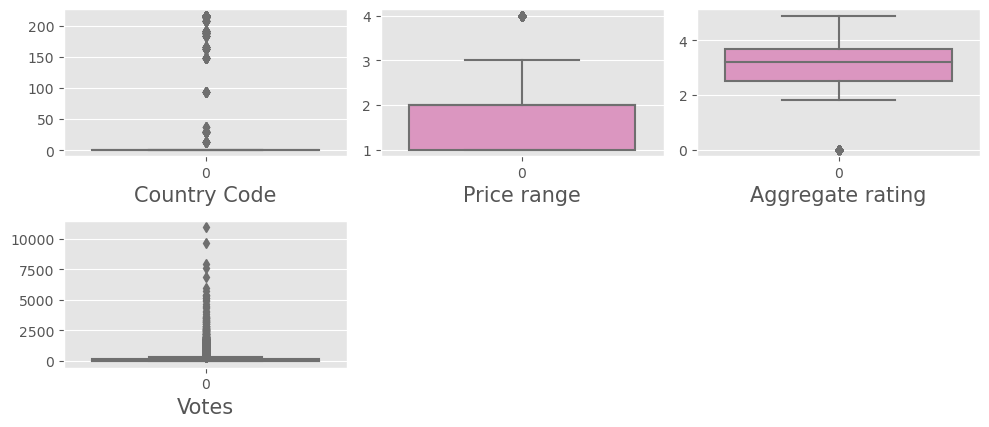

In [1034]:
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(3,3, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

We can not remove outliers from Average cost for two, since its is target variable. We can not remove outliers from Price Range, since it is categorical data. We will not remove outliers from votes,Aggregate rating, country code as removing the outliers is reducing the data and affecting model performance

In [1035]:
df.skew()

Country Code             3.043965
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [1036]:
df["Votes"]=np.cbrt(df["Votes"])

In [1037]:
df["Votes"]=np.sqrt(df["Votes"])

In [1038]:
df["Price range"]=np.cbrt(df["Price range"])

In [1039]:
df.skew()

Country Code             3.043965
Average Cost for two    35.477915
Price range              0.495755
Aggregate rating        -0.954130
Votes                   -0.399093
dtype: float64

In [1040]:
df["Country Code"]=np.cbrt(df["Country Code"])

In [1041]:
df["Country Code"]=np.sqrt(df["Country Code"])

In [1042]:
df.skew()

Country Code             2.885565
Average Cost for two    35.477915
Price range              0.495755
Aggregate rating        -0.954130
Votes                   -0.399093
dtype: float64

We can not remove skewness from target variable i.e. average cost for two

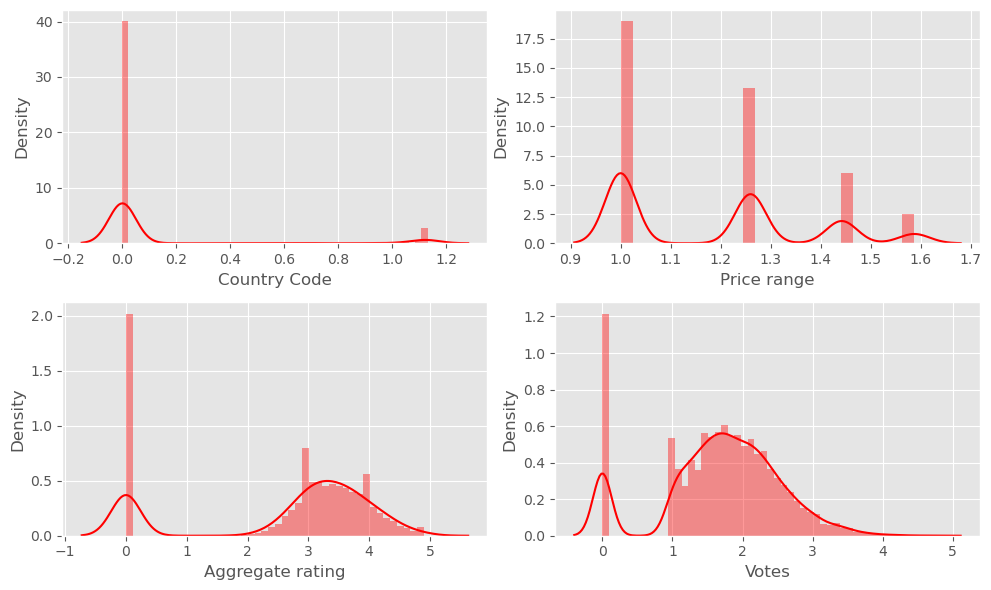

In [1046]:
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color="r")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [1047]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [1048]:
df

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749.0,1.05602,73.0,171.0,920.0,8.0,0.0,1.0,0.0,0.0,1.442250,4.8,0.0,1.0,2.607084,6.0
1,3173.0,1.05602,73.0,593.0,1111.0,11.0,0.0,1.0,0.0,0.0,1.442250,4.5,0.0,1.0,2.896885,6.0
2,2897.0,1.05602,75.0,308.0,1671.0,89.0,0.0,1.0,0.0,0.0,1.587401,4.4,1.0,5.0,2.542303,6.0
3,4707.0,1.05602,75.0,862.0,1126.0,23.0,0.0,0.0,0.0,0.0,1.587401,4.9,0.0,1.0,2.673307,6.0
4,5523.0,1.05602,75.0,862.0,1122.0,23.0,0.0,1.0,0.0,0.0,1.587401,4.8,0.0,1.0,2.473466,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443.0,1.12034,140.0,517.0,1813.0,129.0,11.0,0.0,0.0,0.0,1.442250,4.1,1.0,5.0,3.039166,11.0
9547,1311.0,1.12034,140.0,552.0,1824.0,5.0,11.0,0.0,0.0,0.0,1.442250,4.2,1.0,5.0,3.179949,11.0
9548,3069.0,1.12034,140.0,554.0,1110.0,31.0,11.0,0.0,0.0,0.0,1.587401,3.7,5.0,2.0,2.951437,11.0
9549,513.0,1.12034,140.0,554.0,1657.0,10.0,11.0,0.0,0.0,0.0,1.587401,4.0,1.0,5.0,3.107808,11.0


In [1049]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   float64
 1   Country Code          9551 non-null   float64
 2   City                  9551 non-null   float64
 3   Locality              9551 non-null   float64
 4   Cuisines              9551 non-null   float64
 5   Average Cost for two  9551 non-null   float64
 6   Currency              9551 non-null   float64
 7   Has Table booking     9551 non-null   float64
 8   Has Online delivery   9551 non-null   float64
 9   Is delivering now     9551 non-null   float64
 10  Price range           9551 non-null   float64
 11  Aggregate rating      9551 non-null   float64
 12  Rating color          9551 non-null   float64
 13  Rating text           9551 non-null   float64
 14  Votes                 9551 non-null   float64
 15  Country              

In [1050]:
df.describe()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,0.100000,78.301434,658.128678,989.461732,72.488012,3.977699,0.121244,0.256622,0.003560,1.185953,2.666370,2.952885,1.788713,1.711551,3.736781
std,2142.917876,0.313860,23.198915,315.866877,514.176108,39.855512,0.914242,0.326428,0.436792,0.059561,0.193515,1.516378,1.493048,1.694637,0.836789,2.651963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,0.000000,76.000000,381.000000,497.000000,41.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,1.307660,3.000000
50%,3595.000000,0.000000,88.000000,696.000000,1127.000000,78.000000,4.000000,0.000000,0.000000,0.000000,1.259921,3.200000,2.000000,2.000000,1.772394,3.000000
75%,5485.500000,0.000000,88.000000,921.000000,1353.500000,104.000000,4.000000,0.000000,1.000000,0.000000,1.259921,3.700000,4.000000,3.000000,2.253609,3.000000
max,7445.000000,1.130169,140.000000,1207.000000,1824.000000,139.000000,11.000000,1.000000,1.000000,1.000000,1.587401,4.900000,5.000000,5.000000,4.711182,14.000000


In [1051]:
cor=df.corr()
cor

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,0.020455,-0.001400,0.004322,0.051680,0.013423,0.009669,0.041174,0.028081,0.011984,0.061901,0.029367,-0.007312,0.012132,0.036277,0.017561
Country Code,0.020455,1.000000,-0.176738,-0.120341,-0.137111,-0.105868,-0.045989,-0.065326,-0.163092,-0.019045,0.260838,0.291937,-0.198632,0.227926,0.283506,0.919047
City,-0.001400,-0.176738,1.000000,0.096443,0.026614,0.016368,-0.071996,-0.003762,0.012723,-0.014039,-0.112830,-0.132163,0.110887,-0.098985,-0.118739,-0.180959
Locality,0.004322,-0.120341,0.096443,1.000000,0.006993,0.051457,0.023718,-0.065594,-0.030993,-0.007299,-0.117425,-0.174336,0.036832,-0.036969,-0.192497,-0.118786
Cuisines,0.051680,-0.137111,0.026614,0.006993,1.000000,0.002773,0.068912,0.050639,-0.016639,0.007773,-0.002900,-0.080331,-0.016228,-0.079979,-0.058282,-0.127955
Average Cost for two,0.013423,-0.105868,0.016368,0.051457,0.002773,1.000000,0.071840,-0.193087,0.204887,0.031469,0.061710,0.056231,-0.015173,-0.144728,0.032906,-0.116945
Currency,0.009669,-0.045989,-0.071996,0.023718,0.068912,0.071840,1.000000,0.000640,0.006991,0.001458,0.068469,-0.006939,-0.040430,0.014598,-0.014712,-0.105296
Has Table booking,0.041174,-0.065326,-0.003762,-0.065594,0.050639,-0.193087,0.000640,1.000000,0.101224,-0.016816,0.484939,0.189998,-0.021365,0.044043,0.260055,-0.062076
Has Online delivery,0.028081,-0.163092,0.012723,-0.030993,-0.016639,0.204887,0.006991,0.101224,1.000000,0.101730,0.113208,0.225699,0.011477,-0.080937,0.271415,-0.140464
Is delivering now,0.011984,-0.019045,-0.014039,-0.007299,0.007773,0.031469,0.001458,-0.016816,0.101730,1.000000,0.016257,0.019180,0.001886,-0.031970,0.023148,-0.016607


In [1052]:
cor["Average Cost for two"].sort_values(ascending=False)

Average Cost for two    1.000000
Has Online delivery     0.204887
Currency                0.071840
Price range             0.061710
Aggregate rating        0.056231
Locality                0.051457
Votes                   0.032906
Is delivering now       0.031469
City                    0.016368
Restaurant Name         0.013423
Cuisines                0.002773
Rating color           -0.015173
Country Code           -0.105868
Country                -0.116945
Rating text            -0.144728
Has Table booking      -0.193087
Name: Average Cost for two, dtype: float64

Corr() function depicts the correlation with other paramters.

In [1053]:
df.dtypes

Restaurant Name         float64
Country Code            float64
City                    float64
Locality                float64
Cuisines                float64
Average Cost for two    float64
Currency                float64
Has Table booking       float64
Has Online delivery     float64
Is delivering now       float64
Price range             float64
Aggregate rating        float64
Rating color            float64
Rating text             float64
Votes                   float64
Country                 float64
dtype: object

Separating features and labels

In [1055]:
x=df.drop("Average Cost for two", axis=1)
y=df["Average Cost for two"]

Scaling of the data for model development

In [1056]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant Name,Country Code,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.044706,3.046171,-0.228533,-1.542277,-0.135100,-4.351046,2.692181,-0.587547,-0.059771,1.324498,1.407131,-1.977859,-0.465442,1.070257,0.853457
1,-0.224101,3.046171,-0.228533,-0.206201,0.236387,-4.351046,2.692181,-0.587547,-0.059771,1.324498,1.209281,-1.977859,-0.465442,1.416601,0.853457
2,-0.352904,3.046171,-0.142317,-1.108527,1.325565,-4.351046,2.692181,-0.587547,-0.059771,2.074617,1.143331,-1.308053,1.895070,0.992837,0.853457
3,0.491783,3.046171,-0.142317,0.645468,0.265562,-4.351046,-0.371446,-0.587547,-0.059771,2.074617,1.473081,-1.977859,-0.465442,1.149401,0.853457
4,0.872592,3.046171,-0.142317,0.645468,0.257782,-4.351046,2.692181,-0.587547,-0.059771,2.074617,1.407131,-1.977859,-0.465442,0.910570,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.368580,3.251114,2.659685,-0.446821,1.601750,7.681415,-0.371446,-0.587547,-0.059771,1.324498,0.945480,-1.308053,1.895070,1.586641,2.738952
9547,-1.093055,3.251114,2.659685,-0.336009,1.623144,7.681415,-0.371446,-0.587547,-0.059771,1.324498,1.011430,-1.308053,1.895070,1.754892,2.738952
9548,-0.272635,3.251114,2.659685,-0.329677,0.234442,7.681415,-0.371446,-0.587547,-0.059771,2.074617,0.681680,1.371170,0.124686,1.481797,2.738952
9549,-1.465464,3.251114,2.659685,-0.329677,1.298336,7.681415,-0.371446,-0.587547,-0.059771,2.074617,0.879530,-1.308053,1.895070,1.668676,2.738952


In [1057]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) 
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.007912,Restaurant Name
1,7.658907,Country Code
2,1.071676,City
3,1.051954,Locality
4,1.044261,Cuisines
5,1.048304,Currency
6,1.405959,Has Table booking
7,1.177291,Has Online delivery
8,1.013133,Is delivering now
9,1.895457,Price range


In [1058]:
y.value_counts()

104.0    900
68.0     897
88.0     857
41.0     687
116.0    652
        ... 
131.0      1
49.0       1
24.0       1
125.0      1
110.0      1
Name: Average Cost for two, Length: 140, dtype: int64

In [1059]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [1060]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maximum r2 score is", maxAccu, "at random state", maxRS)

maximum r2 score is 0.20389623887561004 at random state 85


In [1061]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

Importing all libraries

In [591]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error
import numpy as np

In [592]:
LR=LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score", r2_score(y_test,pred_LR))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score 0.17273583825239935
R2_score on training Data: 14.729146011916072
Mean Absolute Error: 28.910291681891902
Mean Squared Error: 1296.4436063478913
Root Mean Squared Error: 36.00616067213903


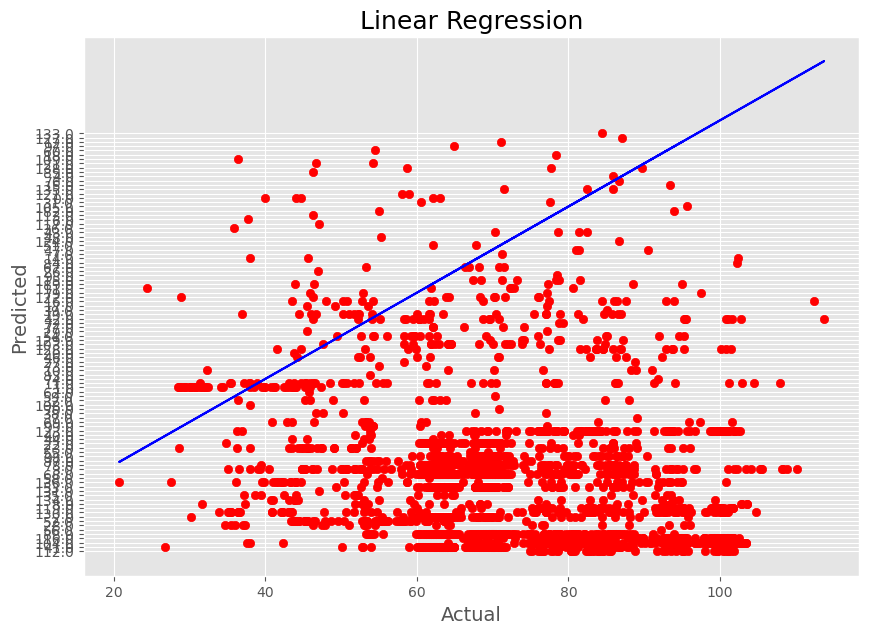

In [593]:
plt.figure(figsize=(10,7))
plt.scatter(x=pred_LR,y=y_test, color="r")
plt.plot(pred_LR, pred_LR, color="b")
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.show()

In [594]:
RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2_score", r2_score(y_test,pred_RFR))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.7282170636094072
R2_score on training Data: 96.22291088534833
Mean Absolute Error: 14.190648988136777
Mean Squared Error: 425.92350362875084
Root Mean Squared Error: 20.637914226703018


In [595]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2_score", r2_score(y_test,pred_GBR))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 0.6802811107950194
R2_score on training Data: 72.6589394239622
Mean Absolute Error: 16.412216543907213
Mean Squared Error: 501.046133635015
Root Mean Squared Error: 22.38405981128122


In [596]:
lasso=Lasso()
lasso.fit(x_train, y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("R2_score", r2_score(y_test,pred_lasso))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score 0.1584356543752119
R2_score on training Data: 14.02219874645012
Mean Absolute Error: 29.778578771898978
Mean Squared Error: 1318.8540803106632
Root Mean Squared Error: 36.31603062437666


In [597]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2_score", r2_score(y_test,pred_rd))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_rd))
print("Mean Squared Error:", mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score 0.172732668431396
R2_score on training Data: 14.729144849105214
Mean Absolute Error: 28.911385156870423
Mean Squared Error: 1296.4485739197542
Root Mean Squared Error: 36.006229654321686


In [598]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2_score", r2_score(y_test,pred_DTR))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_DTR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score 0.5272284649601966
R2_score on training Data: 100.0
Mean Absolute Error: 17.177599441730635
Mean Squared Error: 740.9019539427774
Root Mean Squared Error: 27.219514212101167


In [599]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train, y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2_score", r2_score(y_test,pred_SVR))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_SVR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_SVR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score 0.2775811473488843
R2_score on training Data: 26.85572285321368
Mean Absolute Error: 24.35812648432161
Mean Squared Error: 1132.1357142393274
Root Mean Squared Error: 33.64722446561272


In [600]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2_score", r2_score(y_test,pred_SVR))
print("R2_score on training Data:", r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ETR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ETR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score 0.2775811473488843
R2_score on training Data: 99.9999975032863
Mean Absolute Error: 14.48341939986043
Mean Squared Error: 449.74231549197486
Root Mean Squared Error: 21.207128883749796


On the basis of highest R2 score Random forest regressor is the best model to fit the data.

CROSS-VALIDATION OF THE DATA

In [601]:
from sklearn.model_selection import cross_val_score


In [602]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_LR) - score.mean())*100)

[0.08371725 0.07835782 0.15720844 0.17451034 0.07046332]
0.11285143191561162
difference between R2 score and cross validation score is- 5.988440633678774


In [603]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_RFR) - score1.mean())*100)

[0.46196107 0.72488169 0.72949283 0.74175783 0.47548265]
0.6267152132483055
difference between R2 score and cross validation score is- 10.150185036110171


In [604]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_GBR) - score3.mean())*100)

[0.41869857 0.72417936 0.71034169 0.71066399 0.47105385]
0.6069874936897517
difference between R2 score and cross validation score is- 7.329361710526772


In [605]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_lasso) - score4.mean())*100)

[0.12222134 0.08920733 0.15059507 0.15823697 0.0807806 ]
0.12020825900498795
difference between R2 score and cross validation score is- 3.8227395370223944


In [606]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_rd) - score5.mean())*100)

[0.08386605 0.07838333 0.15720353 0.17449506 0.07069441]
0.11292847844365987
difference between R2 score and cross validation score is- 5.980418998773613


In [607]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_DTR) - score6.mean())*100)

[0.08521614 0.53901543 0.45741093 0.55464905 0.09546813]
0.3463519364366515
difference between R2 score and cross validation score is- 18.08765285235451


In [608]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_SVR) - score7.mean())*100)

[0.21735852 0.20947077 0.23672725 0.27238409 0.2048004 ]
0.2281482067082453
difference between R2 score and cross validation score is- 4.9432940640639


score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print("difference between R2 score and cross validation score is-", (r2_score(y_test,pred_ETR) - score8.mean())*100)

On the basis of cross validation score and difference between R2 and Cross Score - RANDOM FOREST REGRESSOR is the best model to Predict the average cost for two.

Hyper-parameter tuning

In [610]:
from sklearn.model_selection import GridSearchCV

param={"n_estimators":[100,200,300], 
            "criterion":['friedman_mse'],
             "min_samples_split":[2,4,6],
           "min_samples_leaf":[0, 0.5, 1]}

In [611]:
GCV=GridSearchCV(GradientBoostingRegressor(), param, cv=5)

In [612]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'min_samples_leaf': [0, 0.5, 1],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [613]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 300}

In [614]:
Model=RandomForestRegressor(criterion="friedman_mse",min_samples_split=6,min_samples_leaf=1,n_estimators=300)

In [615]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2_score", r2_score(y_test,pred))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred))
print("Mean Squared Error:", mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.7323437707689898
Mean Absolute Error: 14.143786599932998
Mean Squared Error: 419.4563515874863
Root Mean Squared Error: 20.480633573878674


In [616]:
import pickle
filename="Zomato_restaurant.report"
pickle.dump(Model, open(filename, "wb"))

In [617]:
import pickle
loaded_model=pickle.load(open("Zomato_restaurant.report","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

73.23437707689898


In [618]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865
Predicted,113.229822,39.801761,20.888351,110.335283,113.073913,78.765666,48.684635,43.017676,60.128091,24.356262,...,20.331595,64.93247,74.582294,0.943669,116.896931,75.87999,68.061727,8.555356,49.167969,66.537465
Original,112.0,41.0,41.0,104.0,116.0,88.0,88.0,56.0,41.0,28.0,...,2.0,88.0,103.0,1.0,128.0,42.0,78.0,3.0,98.0,68.0


RANDOM FOREST REGRESSOR is the best model to fit the Data. R2 score of test model is 73.23


